In [2]:
%pip install seaborn

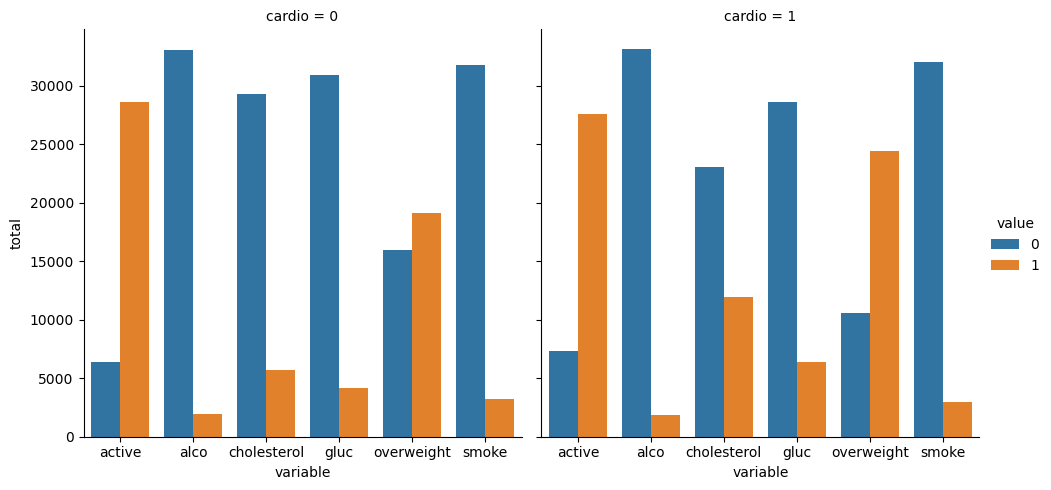

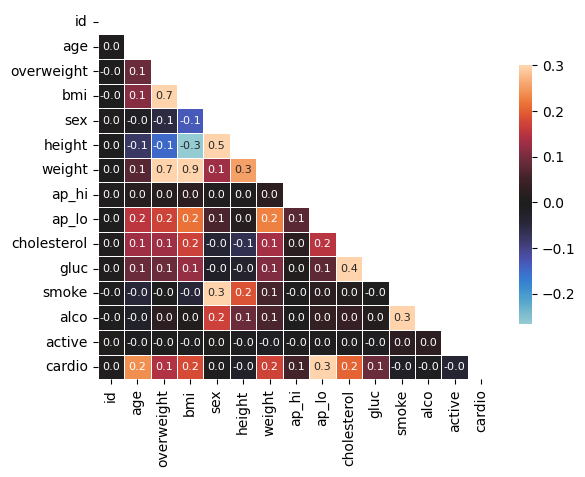

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df.insert(2,"overweight",0)
height_meters = df['height']/100
bmi = df['weight']/(height_meters*height_meters)
df.insert(3,"bmi",bmi)

#setting the overweight to 1 depending on the values of bmi column
df.loc[df["bmi"] > 25, "overweight"] = 1
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["gluc"] == 1, "gluc"] = 0
df.loc[df["gluc"] > 1, "gluc"] = 1
df.loc[df["cholesterol"] > 1, "cholesterol"] = 1

draw_cat_plot()
draw_heat_map()
def draw_cat_plot():
    # 5
    df_cat = df.melt(id_vars='cardio',
                 value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
                 value_name='value')


    # 6
    df_cat = df_cat = pd.DataFrame({'total':df_cat.groupby(['cardio', 'variable'])['value'].value_counts()})\
                                     .rename(columns={'cardio':'Cardio','variable':'Variable', 'value':'Value'})\
                                     .reset_index()
   
    #7

    # 8
    fig = sns.catplot(data=df_cat, y='total', x='variable',col='cardio', kind='bar', hue ='value')

    # 9
    fig.savefig('catplot.png')
    return fig


def draw_heat_map():
    # 11
    df_heat =df_heat =df[(df['ap_lo'] <= df['ap_hi'])&
            (df['height'] >= df['height'].quantile(0.025))&
            (df['height'] <= df['height'].quantile(0.975))&
            (df['weight'] >= df['weight'].quantile(0.025))&
            (df['weight'] <= df['weight'].quantile(0.975))]

    # 12
    corr=df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(df_heat.corr(),dtype=bool))



    # 14
    fig,ax=plt.subplots()

    # 15
    sns.heatmap(data=corr, 
                annot=True, 
                fmt=".1f", 
                linewidth=.5, 
                mask=mask, 
                annot_kws={'fontsize':8}, 
                cbar_kws={"shrink": .7}, 
                square=False, 
                center=0, 
                vmax=0.30);


    # 16
    fig.savefig('heatmap.png')
    return fig

